# BUSINESS UNDERSTANDING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data cleaning 

# Identifying null values 


In [3]:
df.isna().idxmax()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

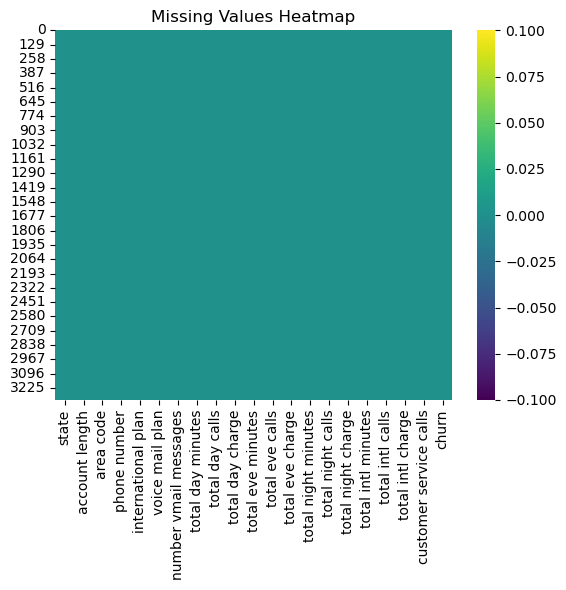

In [4]:
#using seaborn to check missing values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=True, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

## No duplicated 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# Checking duplicates

In [6]:
df.duplicated().idxmax()

0

## No duplicates in the data set


# Identifying the shape

In [7]:
df.shape

(3333, 21)

## the Data set has 3333 data rows and 21 rows

# Dropping some columns

In [8]:
df.drop(["phone number","area code","state"],axis=1,inplace=True)

## Describing df

In [9]:
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Feature engineering

In [10]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Finding the average minutes from the daily callings 

In [11]:
#find the average minutes
#first add the minutes
#second find their average
#third, drop the columns 
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
df['avg_minutes'] = (df['total_minutes'] / 3).round(2)
df = df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total_minutes'], axis=1)

# Finding avg for the callings 

In [12]:
#first add the calls
#second , find the average
#drop the columns
df["total_calls"]=df["total day calls"]+df["total eve calls"]+df["total night calls"]
df["avg_calls"]=(df["total_calls"]/3).round(2)
df.drop(["total day calls","total eve calls","total night calls","total_calls"],axis=1,inplace=True)

# Avg call duration

In [13]:
df['avg_call_duration'] = (df['avg_minutes']/df["avg_calls"]).round(2)

In [14]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day charge,total eve charge,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg_minutes,avg_calls,avg_call_duration
0,128,no,yes,25,45.07,16.78,11.01,10.0,3,2.70,1,False,235.73,100.00,2.36
1,107,no,yes,26,27.47,16.62,11.45,13.7,3,3.70,1,False,203.83,109.67,1.86
2,137,no,no,0,41.38,10.30,7.32,12.2,5,3.29,0,False,175.73,109.33,1.61
3,84,yes,no,0,50.90,5.26,8.86,6.6,7,1.78,2,False,186.07,82.67,2.25
4,75,yes,no,0,28.34,12.61,8.41,10.1,3,2.73,3,False,167.30,118.67,1.41


# Finding charges avg


In [15]:
#first, add avg charges
#second, find the avg
#third, drop the columns
df["total_charge"]=df["total day charge"]+df["total eve charge"]+df["total night charge"]
df["avg_charge"]=(df["total_charge"]/3).round(2)
df.drop(["total day charge","total eve charge","total night charge","total_charge"],axis=1,inplace=True)

# service intensity 

In [16]:
#finding the percentage service intencity with customer service calls over avg calls
df["%_srv_intency"]=((df["customer service calls"]/df["avg_calls"])*100).round(2)
df["%_intl_srv_intensity"]=((df["customer service calls"]/df["total intl calls"])*100).round(2)

In [17]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg_minutes,avg_calls,avg_call_duration,avg_charge,%_srv_intency,%_intl_srv_intensity
0,128,no,yes,25,10.0,3,2.70,1,False,235.73,100.00,2.36,24.29,1.00,33.33
1,107,no,yes,26,13.7,3,3.70,1,False,203.83,109.67,1.86,18.51,0.91,33.33
2,137,no,no,0,12.2,5,3.29,0,False,175.73,109.33,1.61,19.67,0.00,0.00
3,84,yes,no,0,6.6,7,1.78,2,False,186.07,82.67,2.25,21.67,2.42,28.57
4,75,yes,no,0,10.1,3,2.73,3,False,167.30,118.67,1.41,16.45,2.53,100.00


## outputing the new data frame


In [18]:
df.to_csv('df2.csv')

# EXPLORATORY DATA ANALYSIS

In [19]:
df2=pd.read_csv("df2.csv")
df2.head()

,Unnamed: 0,account length,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg_minutes,avg_calls,avg_call_duration,avg_charge,%_srv_intency,%_intl_srv_intensity
0,0,128,no,yes,25,10.0,3,2.70,1,False,235.73,100.00,2.36,24.29,1.00,33.33
1,1,107,no,yes,26,13.7,3,3.70,1,False,203.83,109.67,1.86,18.51,0.91,33.33
2,2,137,no,no,0,12.2,5,3.29,0,False,175.73,109.33,1.61,19.67,0.00,0.00
3,3,84,yes,no,0,6.6,7,1.78,2,False,186.07,82.67,2.25,21.67,2.42,28.57
4,4,75,yes,no,0,10.1,3,2.73,3,False,167.30,118.67,1.41,16.45,2.53,100.00


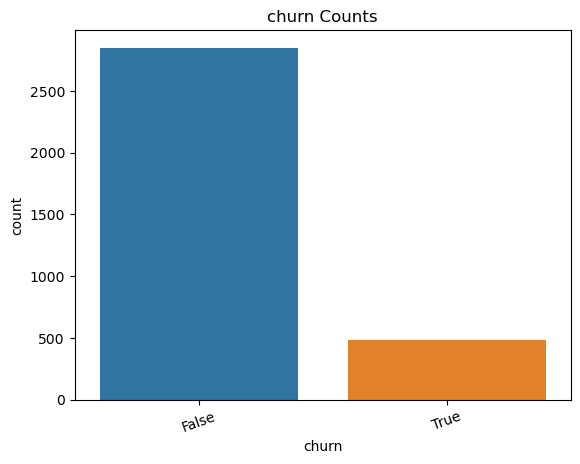

In [20]:
#Counting of the churn ,True and False 
sns.countplot(x='churn', data=df2)
plt.title("churn Counts")
plt.xticks(rotation=20)
plt.show()

## churn is a boolean variable:

## True (or 1) → The customer left/canceled service.

## False (or 0) → The customer stayed.

Text(0.5, 1.0, 'Churn Rate by International Plan')

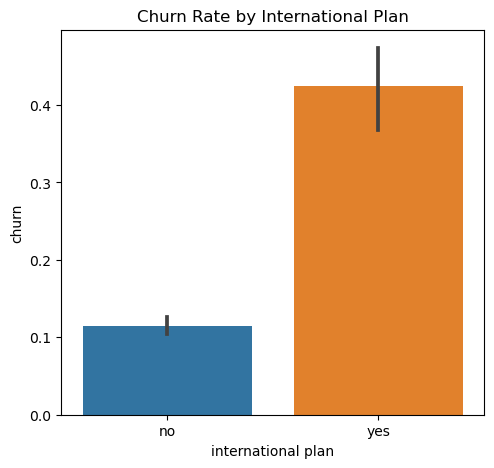

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x="international plan", y="churn", data=df)
plt.title("Churn Rate by International Plan")

### No international plan → relatively low churn rate.

### Yes international plan → significantly higher churn rate.
### Customers with an international plan often churn more frequently than those without.

### Why?

#### Higher bills: International calls can be costly, leading to bill shock.

## change churn to interger

In [22]:
#changing churn to interger
df2["churn"]=df2["churn"].astype(int)
#changing international plan to interger
df2["international plan"] = df2["international plan"].str.strip().str.lower().map({"yes": 1, "no": 0})
#changing voice mail plan to interger
df2["voice mail plan"] = df2["voice mail plan"].str.strip().str.lower().map({"yes": 1, "no": 0})

In [23]:
df2.head()

,Unnamed: 0,account length,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg_minutes,avg_calls,avg_call_duration,avg_charge,%_srv_intency,%_intl_srv_intensity
0,0,128,0,1,25,10.0,3,2.70,1,0,235.73,100.00,2.36,24.29,1.00,33.33
1,1,107,0,1,26,13.7,3,3.70,1,0,203.83,109.67,1.86,18.51,0.91,33.33
2,2,137,0,0,0,12.2,5,3.29,0,0,175.73,109.33,1.61,19.67,0.00,0.00
3,3,84,1,0,0,6.6,7,1.78,2,0,186.07,82.67,2.25,21.67,2.42,28.57
4,4,75,1,0,0,10.1,3,2.73,3,0,167.30,118.67,1.41,16.45,2.53,100.00


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total intl minutes      3333 non-null   float64
 6   total intl calls        3333 non-null   int64  
 7   total intl charge       3333 non-null   float64
 8   customer service calls  3333 non-null   int64  
 9   churn                   3333 non-null   int64  
 10  avg_minutes             3333 non-null   float64
 11  avg_calls               3333 non-null   float64
 12  avg_call_duration       3333 non-null   float64
 13  avg_charge              3333 non-null   float64
 14  %_srv_intency           3333 non-null   

## plotting the correlation of the variables

In [25]:
# displaying the correlation of the variable to churn
correlations = df2.corr(numeric_only=True)["churn"].sort_values(ascending=False)
print(correlations)


churn                     1.000000
international plan        0.259852
avg_charge                0.226968
customer service calls    0.208750
%_intl_srv_intensity      0.205046
%_srv_intency             0.201701
avg_minutes               0.196457
avg_call_duration         0.140939
total intl charge         0.068259
total intl minutes        0.068239
Unnamed: 0                0.040232
avg_calls                 0.019650
account length            0.016541
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


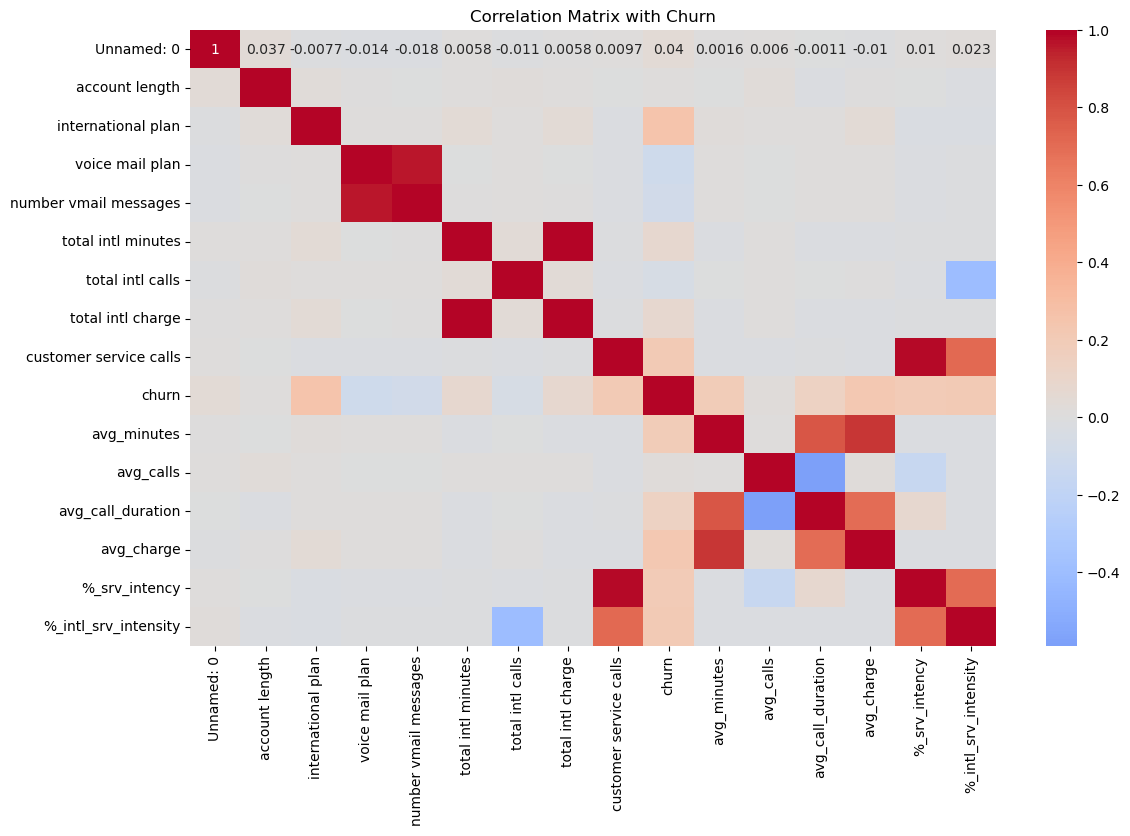

In [26]:
#plotting of the heart map plot 
corr = df2.corr(numeric_only=True)

plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix with Churn")
plt.show()

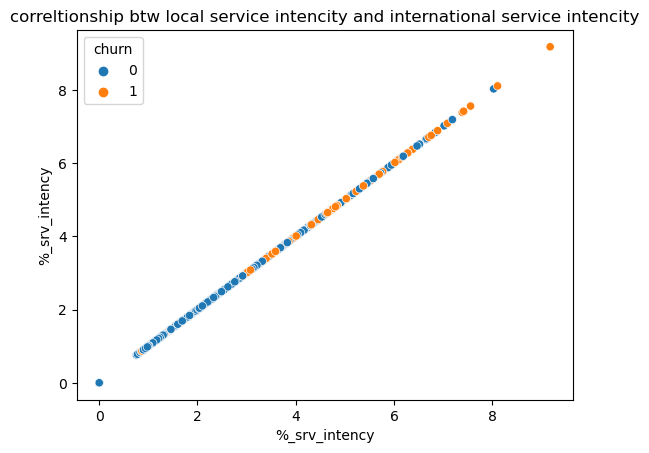

In [27]:
sns.scatterplot(x=df2['%_srv_intency'], y=df2['%_srv_intency'],hue="churn" ,data=df2)
plt.title("correltionship btw local service intencity and international service intencity")
plt.show()

## There is a positive correlation between local client customers service intencity to that of the international 

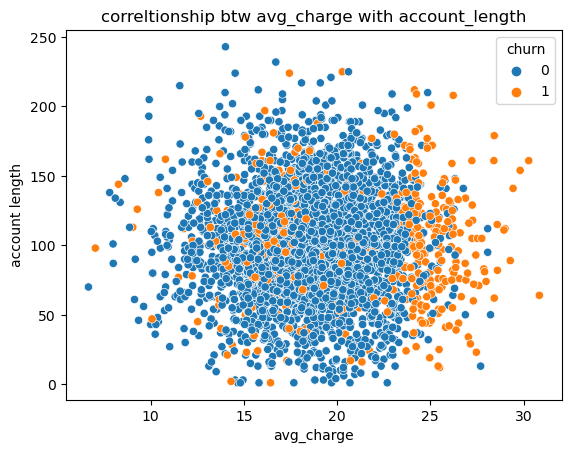

In [28]:
#correlationship between avg_charge with account lenght 
sns.scatterplot(x=df2["avg_charge"], y=df2['account length'],hue="churn" ,data=df2)
plt.title("correltionship btw avg_charge with account_length")
plt.show()

### There is a week positive correlation between the account lenght and avg_charges

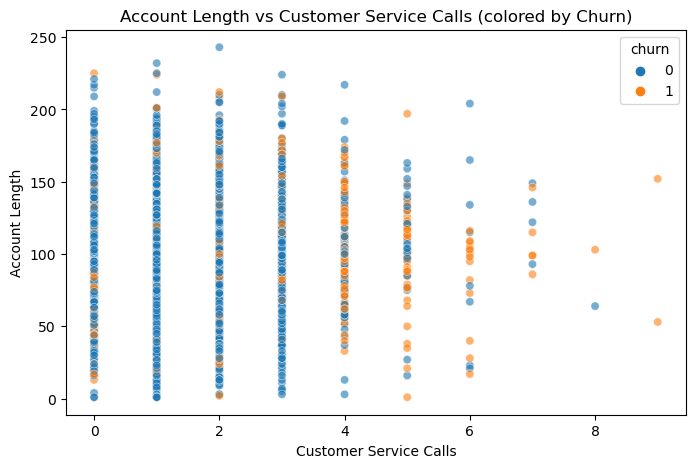

In [29]:
#plotting of the account lenght and customer service over churn
plt.figure(figsize=(8,5))
sns.scatterplot(x="customer service calls", y="account length", hue="churn", data=df2, alpha=0.6)
plt.title("Account Length vs Customer Service Calls (colored by Churn)")
plt.ylabel("Account Length")
plt.xlabel("Customer Service Calls")
plt.show()

### customers with the highest number of customers services were likely to churn from the service 

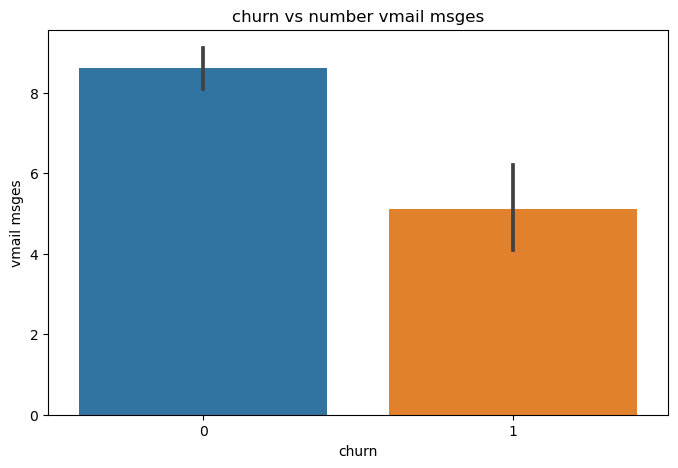

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x="churn", y="number vmail messages", data=df2)
plt.title("churn vs number vmail msges")
plt.ylabel("vmail msges")
plt.xlabel("churn")
plt.show()

### clients with vmails msges were lickly to retain in the services
### The company to increase the use of the vmail messages

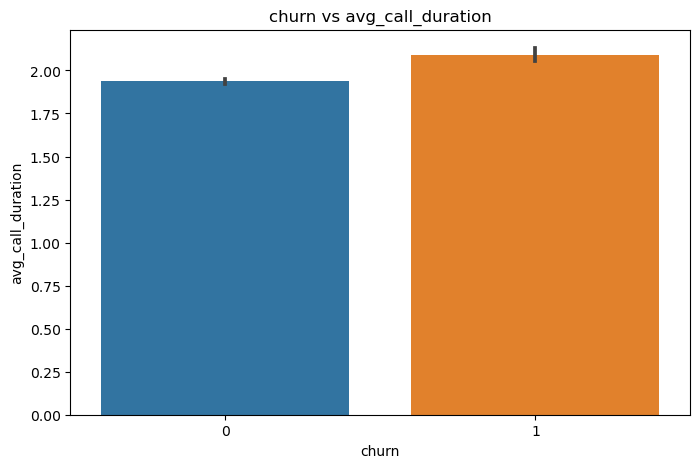

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x="churn", y="avg_call_duration", data=df2)
plt.title("churn vs avg_call_duration")
plt.ylabel("avg_call_duration")
plt.xlabel("churn")
plt.show()

### CONC: clients with the highest number of calls duration are highly churned from the services , due to the too much consuption of resources 


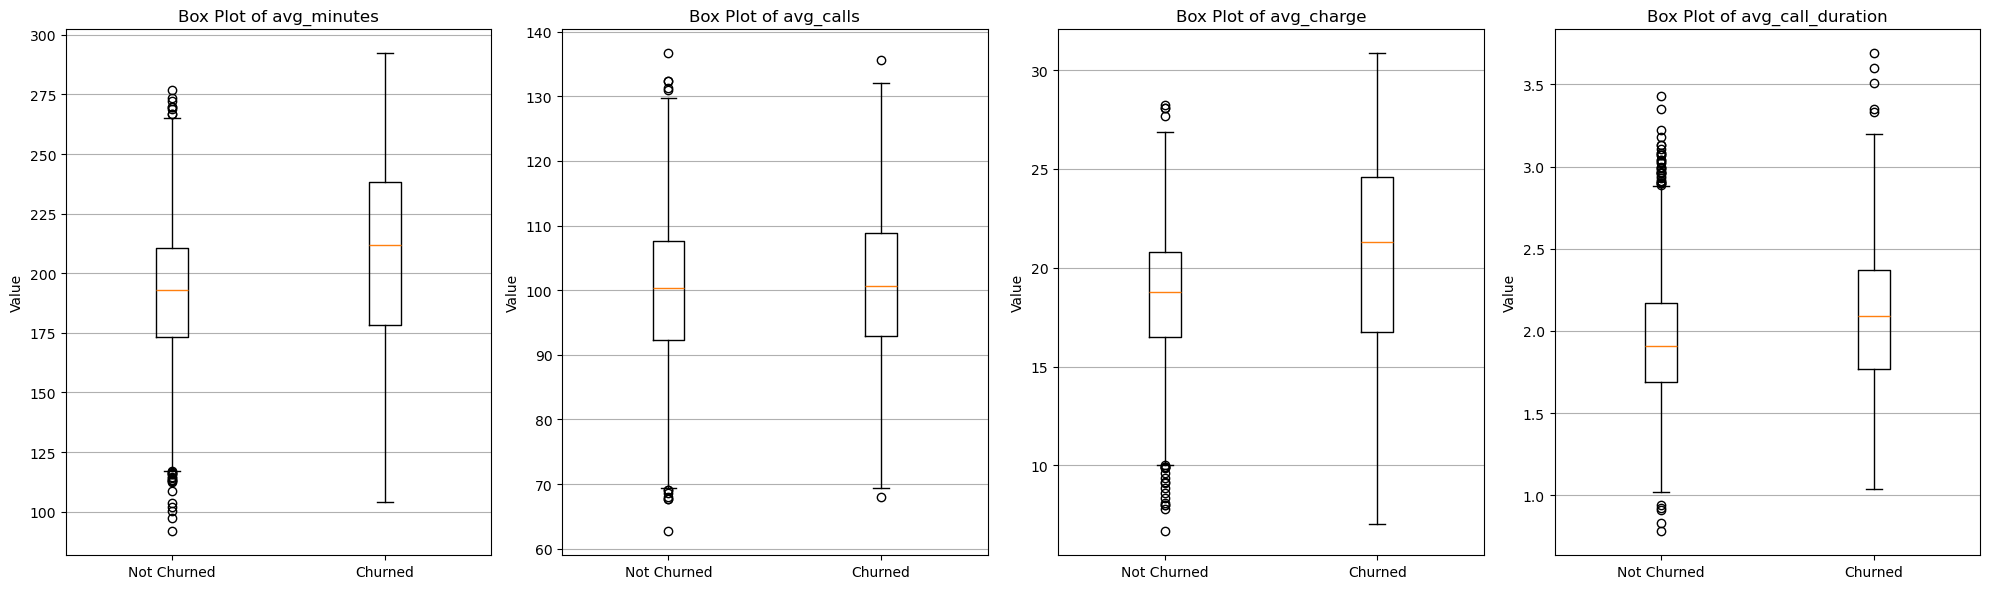

In [32]:
 #ploting of the local clients users  box plots 
df_df2 = df2

# Separate the dataframe into two groups based on the 'churn' column
df_churned = df_df2[df_df2['churn'] == True]
df_not_churned = df_df2[df_df2['churn'] == False]

# List of numerical columns to plot
numerical_cols = ['avg_minutes', 'avg_calls', 'avg_charge', 'avg_call_duration']

# Create a figure with a grid of subplots (1 row, 4 columns)
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(20, 6), sharey=False)

# Loop through each column and create a box plot
for i, col in enumerate(numerical_cols):
    data_to_plot = [df_not_churned[col].dropna(), df_churned[col].dropna()]
    ax = axes[i]
    ax.boxplot(data_to_plot, labels=['Not Churned', 'Churned'])
    ax.set_title(f'Box Plot of {col}', fontsize=12)
    ax.set_ylabel('Value')
    ax.grid(axis='y')

plt.tight_layout()

# Save the plot
plt.savefig('churn_box_plots.png')


### charges box plt has the highes number of churned, the company need to put into consideration of the charges prices to reain clients 

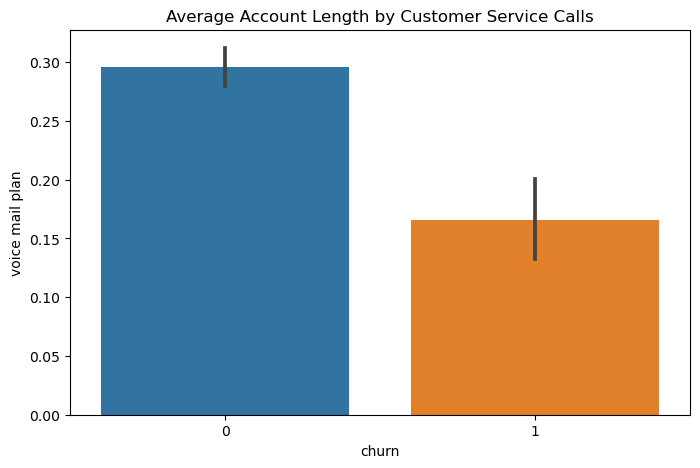

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x="churn", y="voice mail plan", data=df2)
plt.title("Average Account Length by Customer Service Calls")
plt.ylabel("voice mail plan")
plt.xlabel("churn")
plt.show()

###  voice mail is likely to reduce churn, the voice mail need to be cooperated in the company system

In [34]:
df2.head()

,Unnamed: 0,account length,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg_minutes,avg_calls,avg_call_duration,avg_charge,%_srv_intency,%_intl_srv_intensity
0,0,128,0,1,25,10.0,3,2.70,1,0,235.73,100.00,2.36,24.29,1.00,33.33
1,1,107,0,1,26,13.7,3,3.70,1,0,203.83,109.67,1.86,18.51,0.91,33.33
2,2,137,0,0,0,12.2,5,3.29,0,0,175.73,109.33,1.61,19.67,0.00,0.00
3,3,84,1,0,0,6.6,7,1.78,2,0,186.07,82.67,2.25,21.67,2.42,28.57
4,4,75,1,0,0,10.1,3,2.73,3,0,167.30,118.67,1.41,16.45,2.53,100.00


In [35]:
#filling the misising values 
#Handle missing values in '%_intl_srv_intensity' by filling with the mean
df2['%_intl_srv_intensity'] = df2['%_intl_srv_intensity'].fillna(df2['%_intl_srv_intensity'].mean())

In [36]:
df2.isna().sum()

Unnamed: 0                0
account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
avg_minutes               0
avg_calls                 0
avg_call_duration         0
avg_charge                0
%_srv_intency             0
%_intl_srv_intensity      0
dtype: int64

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total intl minutes      3333 non-null   float64
 6   total intl calls        3333 non-null   int64  
 7   total intl charge       3333 non-null   float64
 8   customer service calls  3333 non-null   int64  
 9   churn                   3333 non-null   int64  
 10  avg_minutes             3333 non-null   float64
 11  avg_calls               3333 non-null   float64
 12  avg_call_duration       3333 non-null   float64
 13  avg_charge              3333 non-null   float64
 14  %_srv_intency           3333 non-null   

# Training model using the logistic Regressison

### our training is based on the prediction of the number of clients that subscriped to churn using the logistic model

In [81]:
#importing the libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [39]:
#define the target variable first
#we will use out target variable as churn

In [40]:
#dropping churn from the x variables
X = df2.drop("churn", axis=1)  
y = df2["churn"]

In [41]:
# Identify categorical columns for one-hot encoding
categorical_cols = ['international plan', 'voice mail plan']

In [42]:
# One-hot encode the categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [43]:
# Replace inf/-inf with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Fill NaN values with column mean
X = X.fillna(X.mean())

# Ensuring y matches cleaned X
y = y.loc[X.index]

In [44]:
#splitting the data by 20:80 ,testing and training

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# fitting the model 
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [78]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [82]:
#finding the general accuracy 
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8590704647676162


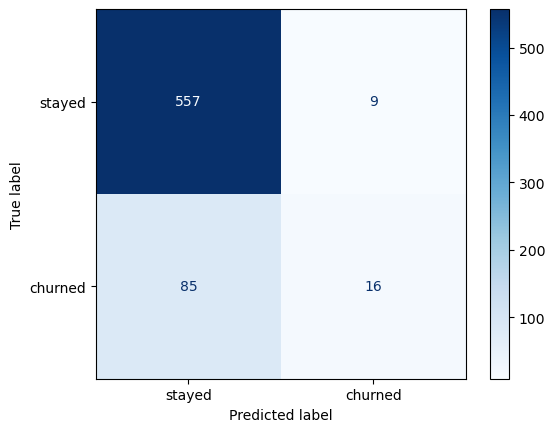

In [80]:
#Plotting the confusion matrix 
cfm=confusion_matrix(y_test,y_pred)                
labels=["stayed","churned"]
disp=ConfusionMatrixDisplay(confusion_matrix=cfm,display_labels=labels)
disp.plot(cmap="Blues");

In [83]:
#finding the classification report from the confusion matrix 
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.64      0.16      0.25       101

    accuracy                           0.86       667
   macro avg       0.75      0.57      0.59       667
weighted avg       0.83      0.86      0.82       667



## Classification report obsrevation

### The model's accuracy is 86%. This means that the model correctly predicted whether a customer would churn or not 860 times out of 1000 instances in the  test dataset.
#### 0 - not-churned
#### 1 - churned
####  Precision- It focuses on the quality of the model's predictions, not churned,87%, churned,64%
#### Recall    - It measures how good the model is at predicting positives, not churned(98%), churned(16%)
#### F1-score  - It combines precision and recall into a single metric to balance the trade-off, not churned (92%), churned(25%)
#### Support   - The number of actual customers in each category within your test set. There were 566 non-churned and 101 churned customers, showing an imbalanced dataset.


## Decision tree 

In [73]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay 

In [103]:
#building a decision tree
tr_mdl = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=42)
tr_mdl.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [88]:
#predicting the accuracy and the evaluation
y_pred = tr_mdl.predict(X_test)

In [89]:
#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9460269865067467


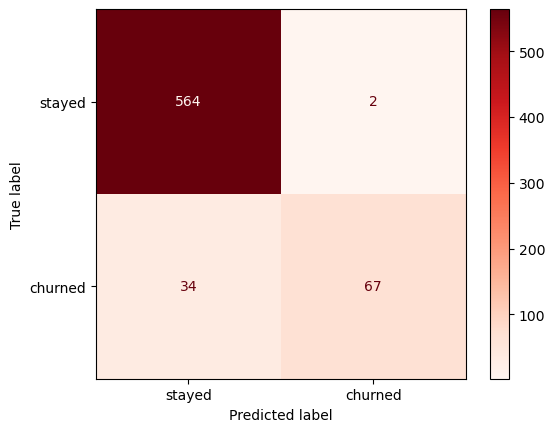

In [90]:
#plotting Confusion matrix 

cfm=confusion_matrix(y_test,y_pred)                
labels=['stayed','churned']
disp=ConfusionMatrixDisplay(confusion_matrix=cfm,display_labels=labels)
disp.plot(cmap='Reds');

In [91]:
#classification report 
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       566
           1       0.97      0.66      0.79       101

    accuracy                           0.95       667
   macro avg       0.96      0.83      0.88       667
weighted avg       0.95      0.95      0.94       667



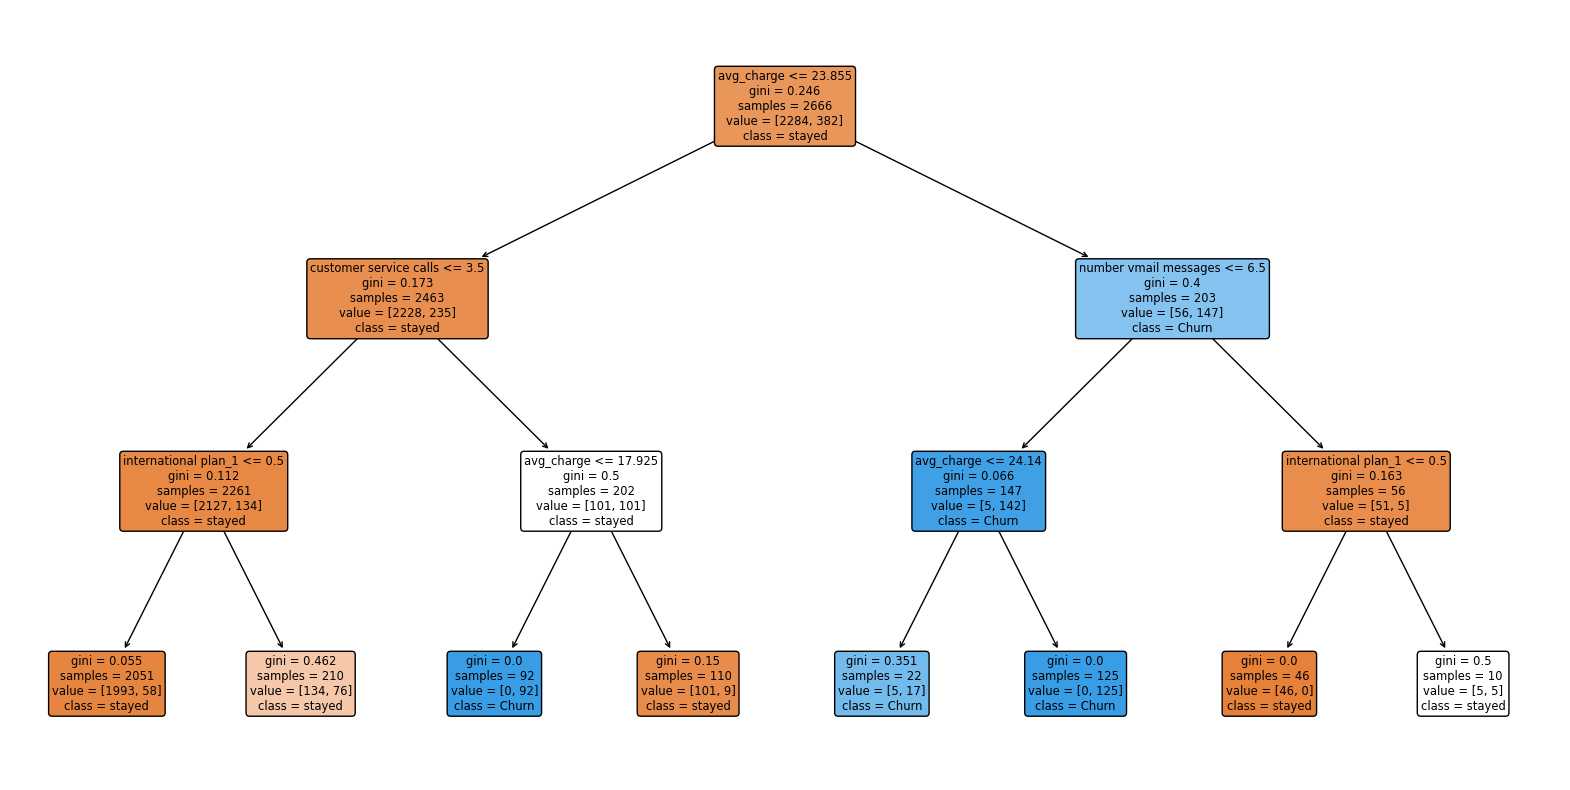

In [104]:
#plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(tr_mdl,feature_names=X.columns,class_names=["stayed", "Churn"],filled=True, rounded=True)
plt.show()

## Handling data imbalance by SMOTE(Synthetic Minority Over-sampling Technique)

### SMOTE generates synthetic instances for the minority class by interpolating between neighboring instances.
### This approach creates new, realistic data points and helps prevent overfitting compared to random oversampling.

In [92]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on training data only
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [108]:
# Train decision tree on resampled data
tree_smote = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_smote.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [95]:
#perform  prediction on the resampled data
y_pred = tree_smote.predict(X_test)

In [96]:
#finding out the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8710644677661169


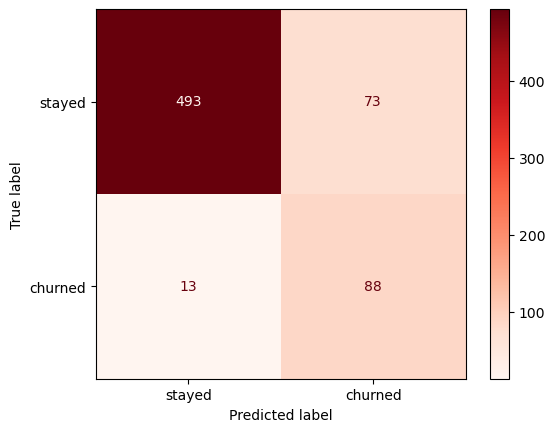

In [97]:
#plotting Confusion matrix on the resample data

cfm=confusion_matrix(y_test,y_pred)                
labels=['stayed','churned']
disp=ConfusionMatrixDisplay(confusion_matrix=cfm,display_labels=labels)
disp.plot(cmap='Reds');

In [98]:
#performing the report clarification
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       566
           1       0.55      0.87      0.67       101

    accuracy                           0.87       667
   macro avg       0.76      0.87      0.80       667
weighted avg       0.91      0.87      0.88       667



### Confusion matrix 
#### 493 (True Negatives, TN)
         -493 customers actually stayed, and the model correctly predicted them as staying.
#### 73 (False Positives, FP)
         -73 customers actually stayed, but the model incorrectly predicted they would churn.
#### 13 (False Negatives, FN)
        -13 customers actually churned, but the model predicted they would stay.
#### 88 (True Positives, TP)   
        -88 customers actually churned, and the model correctly predicted churn

### Clasiffication Report
### Performance on majory class

1) Precision = 0.97: When the model predicts a customer will stay, it is correct 97% of the time. This is excellent

### Conclution 
####   The second model, Matrix 2, is the better choice. Because in churn problems, missing churners (false negatives) is much worse than a few false alarms
#### Also, the Model is excellent at catching churners (87% recall)

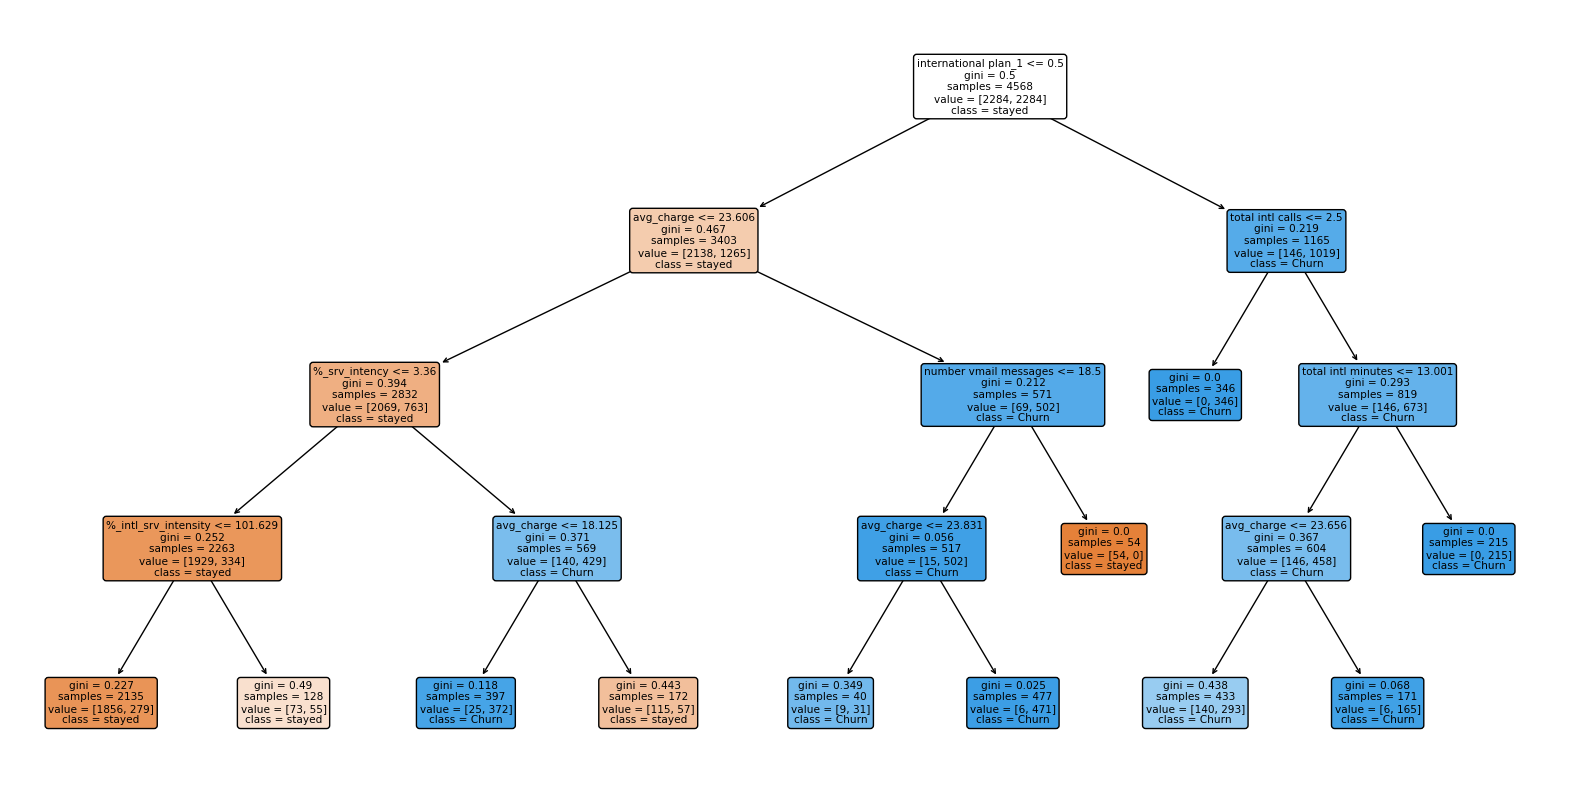

In [109]:
#plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_smote,feature_names=X.columns,class_names=["stayed", "Churn"],filled=True, rounded=True)
plt.show()